In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r'car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#chech how many features have null value
null_value = [feature for feature in df.columns  if df[feature].isnull().sum()>1]
for feature in null_value:
    print("{} is having {} null value".format(feature,df[feature].count()))


In [6]:
#means there is no null value in the dataset

In [7]:
unique_feature = [feature for feature in df.columns if df[feature].dtypes=='O' and feature not in 'Car_Name']
for feature in unique_feature:
    print("{} is having {} feature".format(feature,df[feature].unique()))

Fuel_Type is having ['Petrol' 'Diesel' 'CNG'] feature
Seller_Type is having ['Dealer' 'Individual'] feature
Transmission is having ['Manual' 'Automatic'] feature


In [8]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

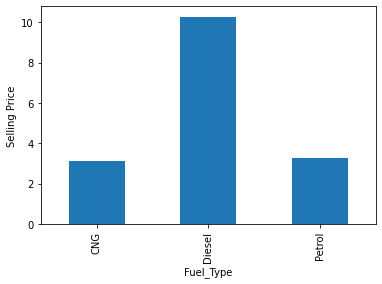

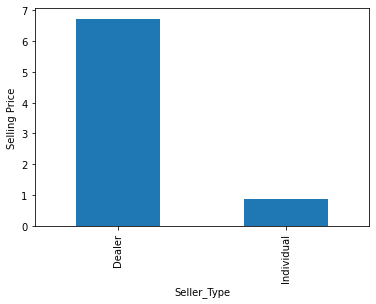

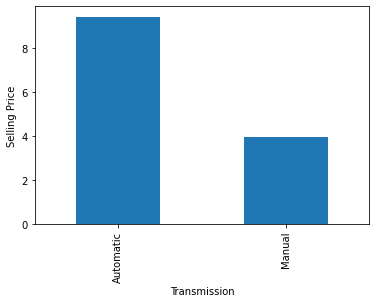

In [9]:
for feature in  unique_feature:
    df.groupby(feature)['Selling_Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
    plt.show()

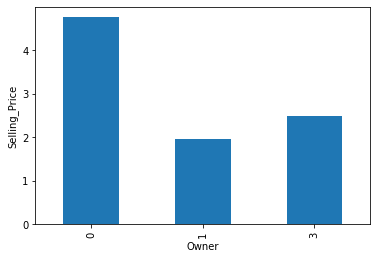

In [10]:
    df.groupby(df.Owner)['Selling_Price'].mean().plot.bar()
    plt.xlabel('Owner')
    plt.ylabel('Selling_Price')
    plt.show()

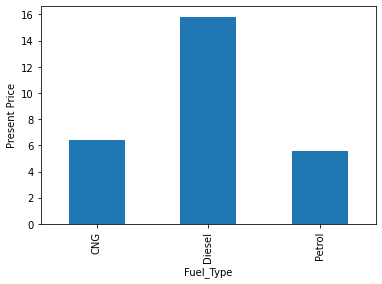

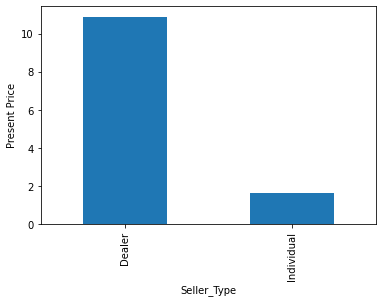

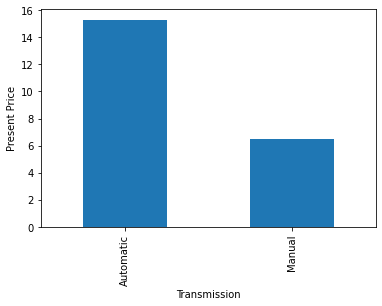

In [11]:
for feature in  unique_feature:
    df.groupby(feature)['Present_Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Present Price')
    plt.show()

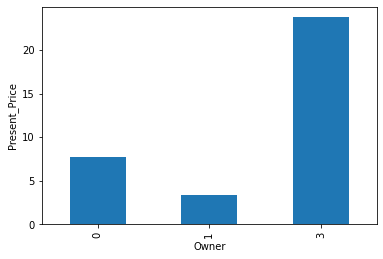

In [12]:
    df.groupby(df.Owner)['Present_Price'].mean().plot.bar()
    plt.xlabel('Owner')
    plt.ylabel('Present_Price')
    plt.show()

In [13]:
df['Old_car'] = 2022 - df['Year']

In [14]:
df['Old_car']

0       8
1       9
2       5
3      11
4       8
       ..
296     6
297     7
298    13
299     5
300     6
Name: Old_car, Length: 301, dtype: int64

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Old_car'>

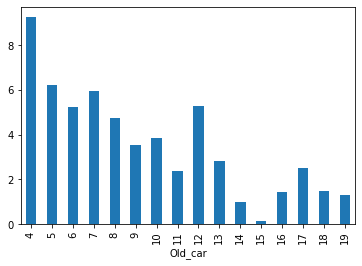

In [16]:
df.groupby(df.Old_car)['Selling_Price'].mean().plot.bar()

<AxesSubplot:xlabel='Old_car'>

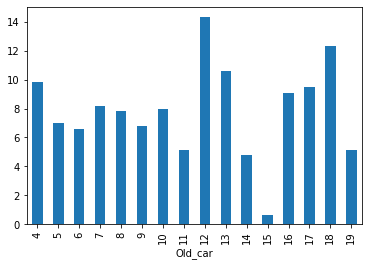

In [17]:
df.groupby(df.Old_car)['Present_Price'].mean().plot.bar()

In [18]:
data=df.copy()

In [19]:
data.drop(['Car_Name','Year'],axis=1 , inplace = True)

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


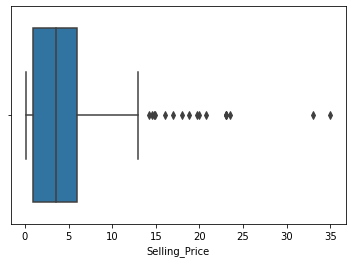

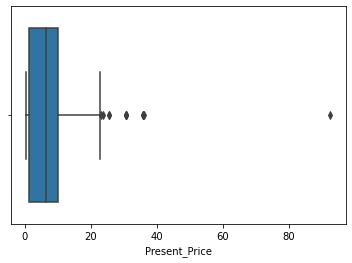

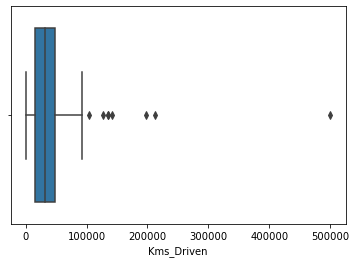

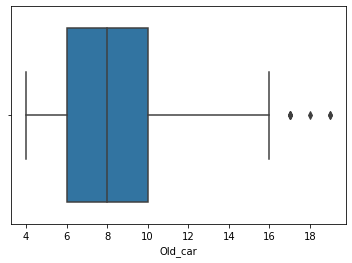

In [21]:
import warnings
warnings.filterwarnings('ignore')
Numerical_feature = [feature for feature in data.columns if data[feature].dtypes !='O' and feature not in 'Owner']
for feature in Numerical_feature:
    sns.boxplot(data[feature])
    plt.show()


In [22]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Old_car'],
      dtype='object')

In [23]:
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old_car
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,8.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,4.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000
50%,3.600000,6.400000,32000.000000,0.000000,8.000000
75%,6.000000,9.900000,48767.000000,0.000000,10.000000
max,35.000000,92.600000,500000.000000,3.000000,19.000000


In [24]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [25]:
final_dataset = pd.get_dummies(data,drop_first = True)

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [27]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Old_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [28]:
#selling Price and Present Price is highly correlated

In [29]:
#handling outlier in Selling Price, Kms_driven and Old car
IQR = final_dataset['Selling_Price'].quantile(0.75)- final_dataset['Selling_Price'].quantile(0.25)
lower_limit = final_dataset['Selling_Price'].quantile(0.25) - IQR*1.5
upper_limit = final_dataset['Selling_Price'].quantile(0.25) + IQR*1.5
print(lower_limit),print(upper_limit),print(final_dataset['Selling_Price'].mean())

-6.749999999999999
8.549999999999999
4.661295681063127


(None, None, None)

In [30]:
final_dataset.loc[final_dataset.Selling_Price <= -6.75, 'Selling_Price']= -6.75
final_dataset.loc[final_dataset.Selling_Price >= 8.55 ,'Selling_Price'] = 8.55

<AxesSubplot:xlabel='Selling_Price'>

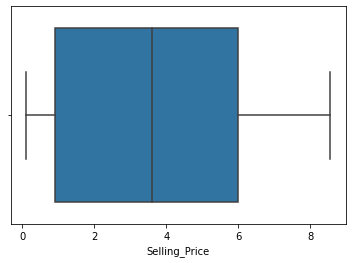

In [31]:
sns.boxplot(data=final_dataset,x='Selling_Price')

In [32]:
final_dataset.drop(final_dataset[final_dataset['Kms_Driven'] > 400000].index,axis=0,inplace=True )

In [33]:
IQR = final_dataset['Kms_Driven'].quantile(0.75)- final_dataset['Kms_Driven'].quantile(0.25)
lower_limit = final_dataset['Kms_Driven'].quantile(0.25) - IQR*1.5
upper_limit = final_dataset['Kms_Driven'].quantile(0.25) + IQR*1.5
print(lower_limit),print(upper_limit),print(final_dataset['Kms_Driven'].mean())

-34787.625
64787.625
35403.69666666666


(None, None, None)

In [34]:
final_dataset.loc[final_dataset.Selling_Price <= -84575.25, 'Kms_Driven']=-34787.625
final_dataset.loc[final_dataset.Selling_Price >= 64787.625 ,'Kms_Driven'] = 64787.625

<AxesSubplot:xlabel='Kms_Driven'>

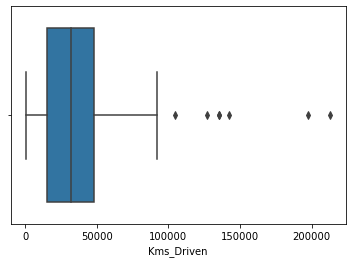

In [35]:
sns.boxplot(data=final_dataset,x='Kms_Driven')

In [36]:
IQR = final_dataset['Old_car'].quantile(0.75)- final_dataset['Old_car'].quantile(0.25)
lower_limit = final_dataset['Old_car'].quantile(0.25) - IQR*1.5
upper_limit = final_dataset['Old_car'].quantile(0.25) + IQR*1.5
print(lower_limit),print(upper_limit),print(final_dataset['Old_car'].mean())

0.0
12.0
8.353333333333333


(None, None, None)

In [37]:
final_dataset.loc[final_dataset.Selling_Price >= 12.0 ,'Old_car'] = 12.0

<AxesSubplot:xlabel='Old_car'>

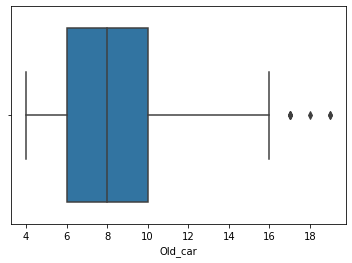

In [38]:
sns.boxplot(data=final_dataset,x='Old_car')

In [39]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,8,0,1,0,1
1,4.75,9.54,43000.0,0,9,1,0,0,1
2,7.25,9.85,6900.0,0,5,0,1,0,1
3,2.85,4.15,5200.0,0,11,0,1,0,1
4,4.60,6.87,42450.0,0,8,1,0,0,1


In [40]:
X = final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [41]:
X.head()

,Present_Price,Kms_Driven,Owner,Old_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000.0,0,8,0,1,0,1
1,9.54,43000.0,0,9,1,0,0,1
2,9.85,6900.0,0,5,0,1,0,1
3,4.15,5200.0,0,11,0,1,0,1
4,6.87,42450.0,0,8,1,0,0,1


In [42]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(model.feature_importances_)

[0.22133725 0.0258617  0.00237583 0.10617269 0.05337072 0.0210624
 0.55659836 0.01322105]


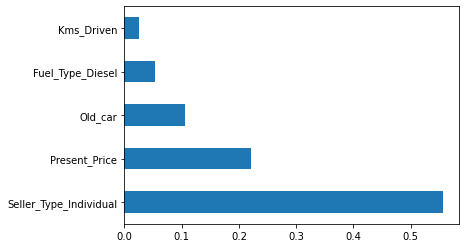

In [45]:
feature_importance = pd.Series(model.feature_importances_,index= X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state = 0)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regressor = RandomForestRegressor()

In [49]:
n_estimator =[int(x) for x in np.linspace(start =100,stop=1200,num=12)]
print(n_estimator)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [50]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
rf = RandomForestRegressor()

In [54]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5,verbose=2,random_state=42,n_jobs=1)

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [57]:
rf_random.best_score_

-0.43712482048771506

In [58]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

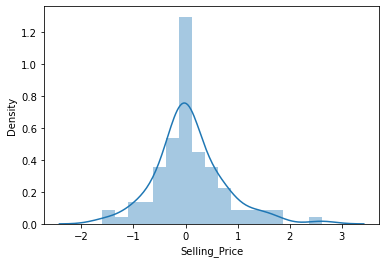

In [59]:
sns.distplot(y_test-predictions)

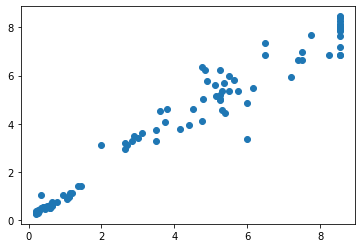

In [60]:
plt.scatter(y_test,predictions)

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.45848111111109946
MSE: 0.442207853222213
RMSE: 0.6649871075609007


In [63]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)